In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as patches

In [2]:
v1 = np.array([1, 0])
v2 = np.array([0.5, np.sqrt(3)/2])

rad = 4
dis = int(rad * 2 / np.sqrt(3)) + 1

points = []

for i in range(-dis, dis):
    for j in range(-dis, dis):
        p = i * v1 + j * v2
        if np.linalg.norm(p) < rad + 1e-6:
            points.append(p)

points = np.array(points)

(np.float64(-4.4),
 np.float64(4.4),
 np.float64(-3.8105117766515297),
 np.float64(3.8105117766515297))

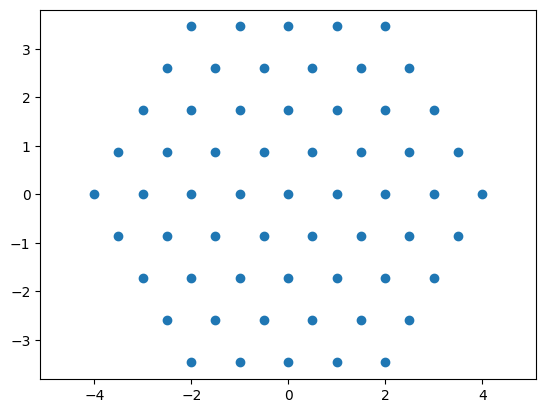

In [3]:
plt.scatter(points[:, 0], points[:, 1])

# make the x and y axes equal
plt.axis('equal')

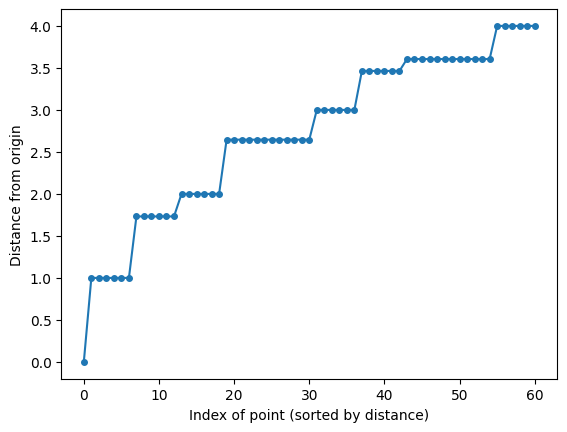

In [4]:
# sort the points by distance from the origin, also find the distances before sorting
distances = np.linalg.norm(points, axis=1)
sorted_indices = np.argsort(distances)
points = points[sorted_indices]
distances = distances[sorted_indices]

plt.plot(distances, 'o-', markersize=4)
plt.xlabel('Index of point (sorted by distance)')
plt.ylabel('Distance from origin')

plt.savefig('points_per_radius.svg', bbox_inches='tight')

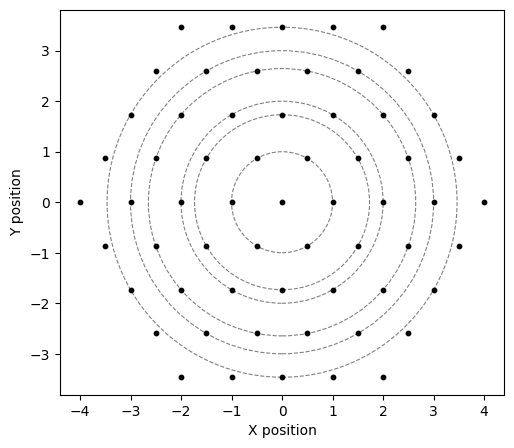

In [5]:
done_radii = 0
fig, ax = plt.subplots(figsize=(6, 5))

for point, distance in zip(points, distances):
    if not done_radii - 1e-6 < distance < done_radii + 1e-6:
        circle = patches.Circle((0, 0), distance, fill=False, linestyle='--', color='gray', linewidth=0.8)
        ax.add_patch(circle)
        done_radii = distance
    if done_radii > 3:
        break

# Optionally: scatter the points for context
ax.scatter(*zip(*points), s=10, color='black')

# Set aspect and limits
ax.set_aspect('equal')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.savefig('concentric_shells.svg', bbox_inches='tight')